# Diamond Price Prediction

## Description

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond color, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of the top of diamond relative to widest point (43--95)

## Exploring the Data

### Get Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
data.drop(['Id'], axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


we see that the data has no null / missing values . We notice that the columns 'cut' , 'color' , 'clarity' are categorical columns and the rest are numeric. 

### Categories: cut, color, clarity

In [6]:
categories_columns = ['cut', 'color', 'clarity']
for category in categories_columns:
    print(data[category].value_counts())
    print()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64



### Numeric values

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


 we remove zero values for x , y , z .


In [8]:
data = data[(data['x'] > 0) & (data['y'] > 0) & (data['z'] > 0)]
data.shape

(43135, 10)

### Histograms

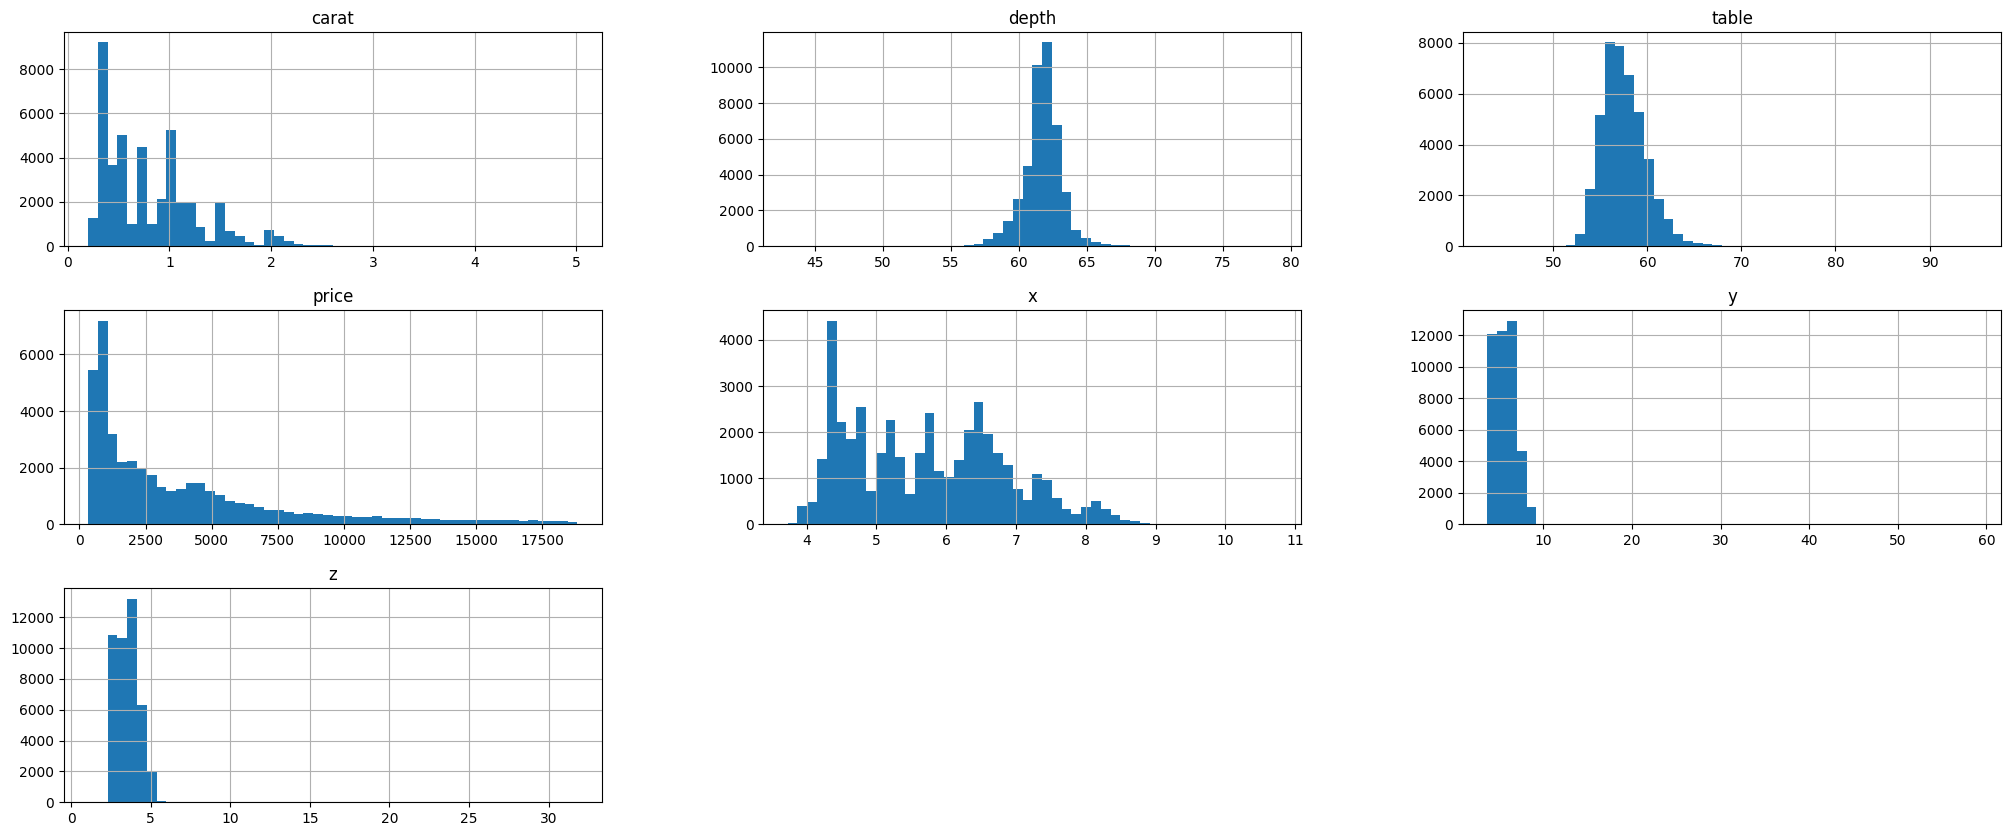

In [9]:
data.hist(bins=50, figsize=(25,10));

we analyze the histograms to check whether data needs normalization : 

- Carat: The range of values is between 0.2 and 5.01, which is relatively wide. Normalization could be needed.
- Depth: The range is between 43 and 79, which is not extremely wide. However, the scale is different from other features.
- Table: The range is between 43 and 95, which is wide. Normalization could be needed.
- x, y, z: The ranges are similar for all three dimensions, but they are different from the other features.

we normalize the numeric data using StandardScalar in a later step . 

In [10]:
from scipy.stats import skew # type: ignore

numeric_data = data.drop(categories_columns, axis=1)
skewness = numeric_data.skew(axis=0)

for column, skew in skewness.items():
    print(f"Column: {column}, Skewness: {skew}")

Column: carat, Skewness: 1.1085574097341075
Column: depth, Skewness: -0.1582094991631128
Column: table, Skewness: 0.8038267461490484
Column: price, Skewness: 1.6163743574413718
Column: x, Skewness: 0.39616893669506537
Column: y, Skewness: 2.9300213955848227
Column: z, Skewness: 1.865789068184469


- carat: right-skewed distribution --> there are more smaller diamonds in the dataset, with fewer larger diamonds.

- depth: slight left-skewed distribution --> since it's small, the distribution is close to symmetric.

- table: right-skewed distribution --> there are more diamonds with smaller table values in the dataset.

- price: right-skewed distribution --> there are more lower-priced diamonds in the dataset.

- x: right-skewed distribution --> there are more smaller values for the length of the diamond.

- y: heavily right-skewed distribution --> there are significantly more smaller values for the width of the diamond.

- z: right-skewed distribution --> there are more smaller values for the depth of the diamond.

In [11]:
numerical_columns = ['carat','table', 'x', 'y', 'z']

# Apply np.log transformation to each numerical column
for column in numerical_columns:

    data[column] = np.log(data[column])

# Check the skewness of transformed data
skewness_after = data[numerical_columns].skew()
print("Skewness after transformation:")
print(skewness_after)

Skewness after transformation:
carat    0.095161
table    0.596004
x        0.103722
y        0.158987
z        0.126458
dtype: float64


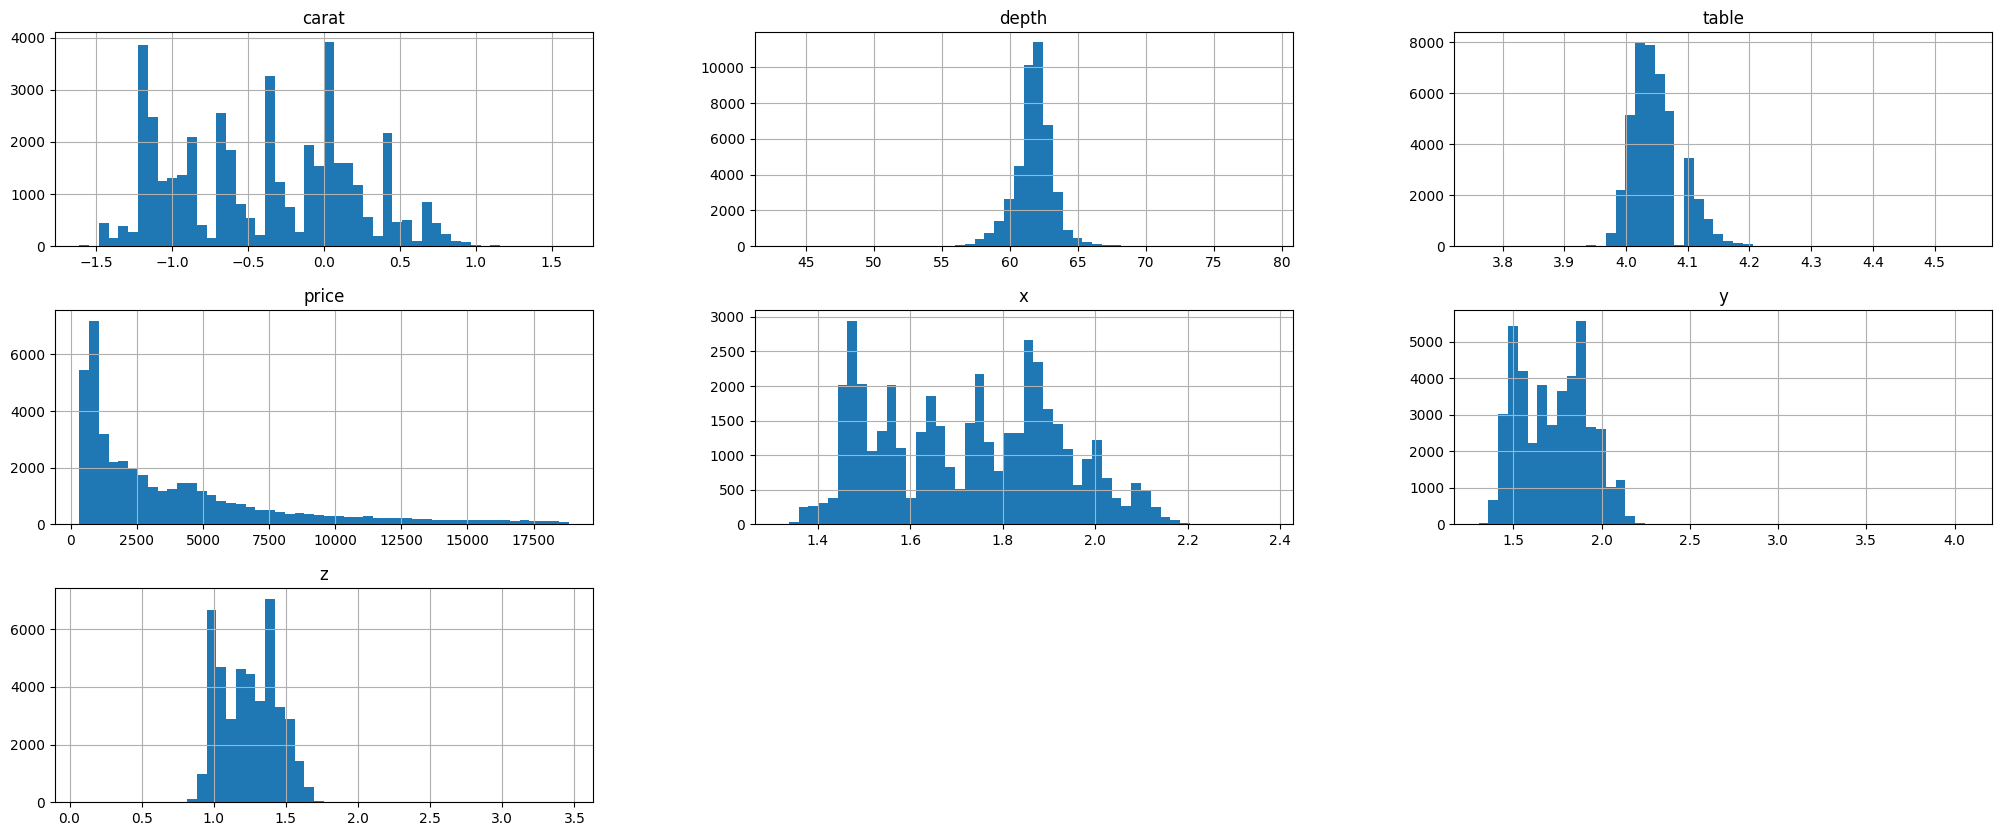

In [12]:
data.hist(bins=50, figsize=(25,10));

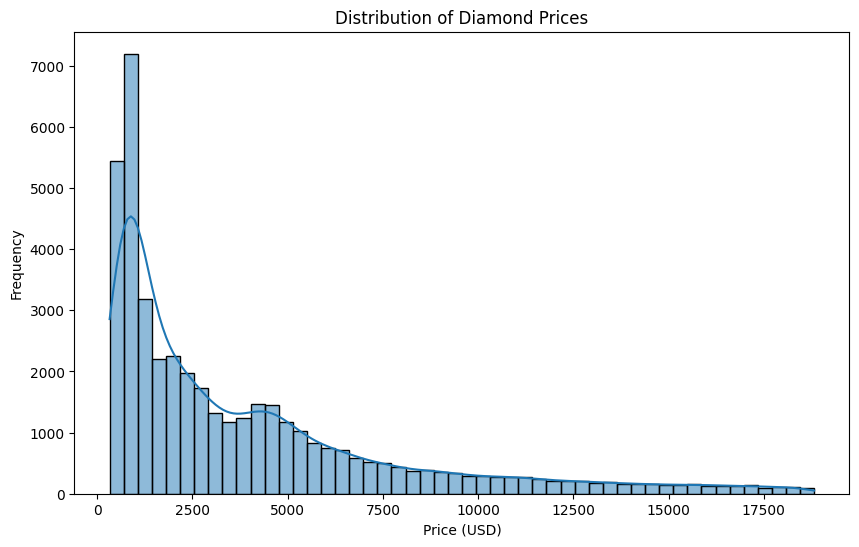

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


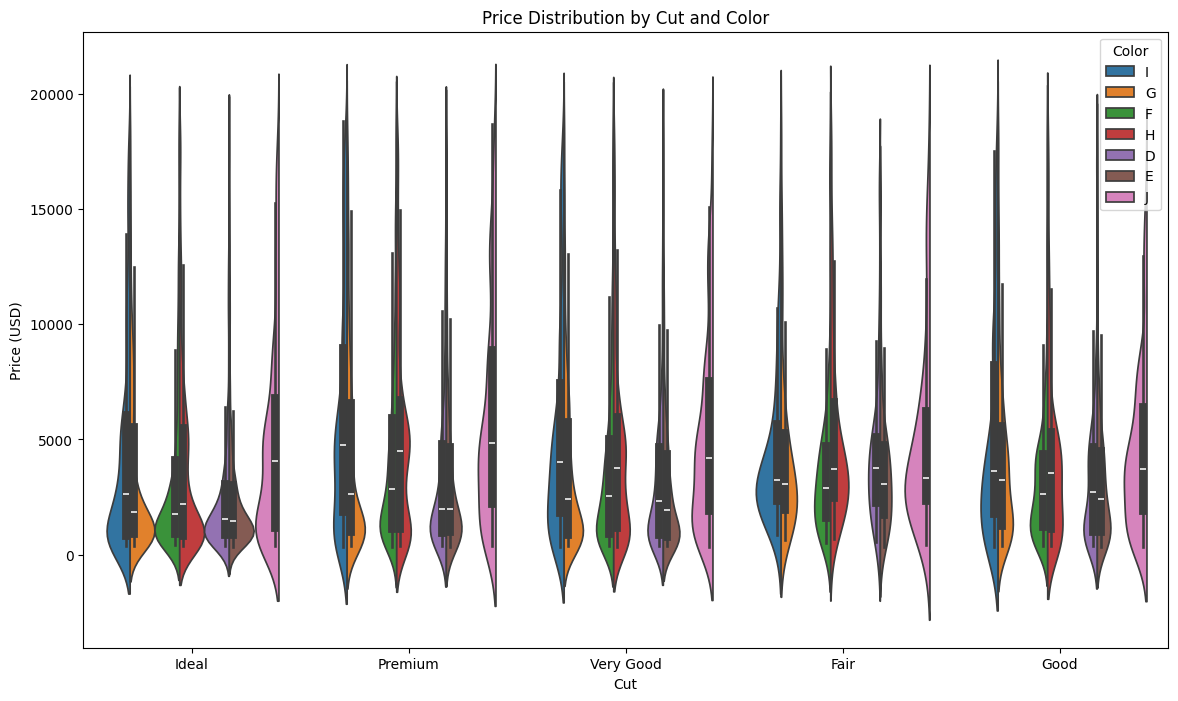

In [14]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='cut', y='price', hue='color', data=data, split=True)
plt.title('Price Distribution by Cut and Color')
plt.xlabel('Cut')
plt.ylabel('Price (USD)')
plt.legend(title='Color')
plt.show()


C:\Users\shaym\AppData\Local\Temp\ipykernel_21940\142172853.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cut', y='price', hue='color', data=data, ci=None)


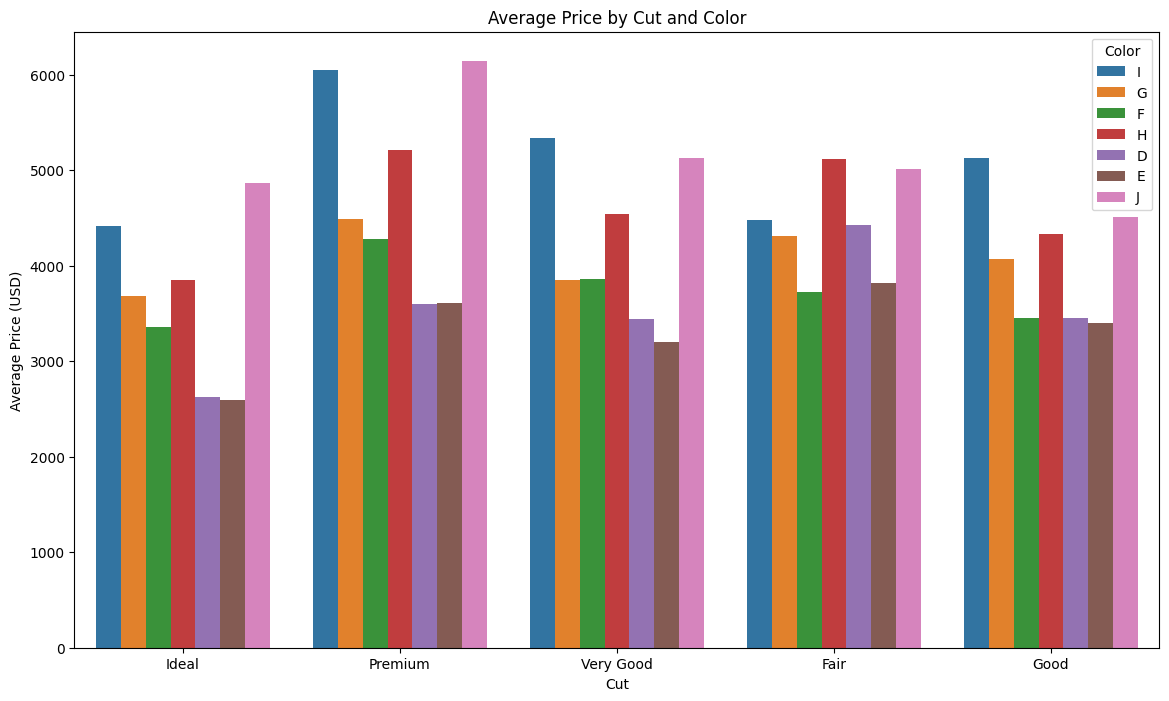

C:\Users\shaym\AppData\Local\Temp\ipykernel_21940\142172853.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cut', y='price', hue='clarity', data=data, ci=None)


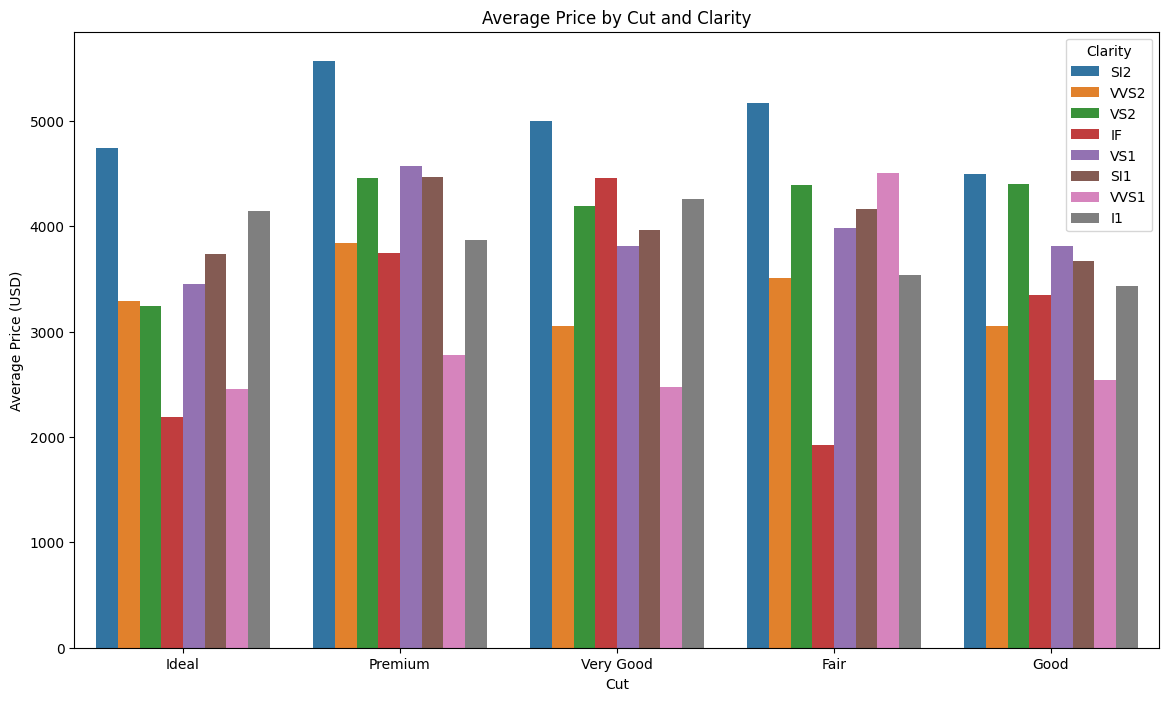

In [15]:
plt.figure(figsize=(14, 8))
sns.barplot(x='cut', y='price', hue='color', data=data, ci=None)
plt.title('Average Price by Cut and Color')
plt.xlabel('Cut')
plt.ylabel('Average Price (USD)')
plt.legend(title='Color')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='cut', y='price', hue='clarity', data=data, ci=None)
plt.title('Average Price by Cut and Clarity')
plt.xlabel('Cut')
plt.ylabel('Average Price (USD)')
plt.legend(title='Clarity')
plt.show()


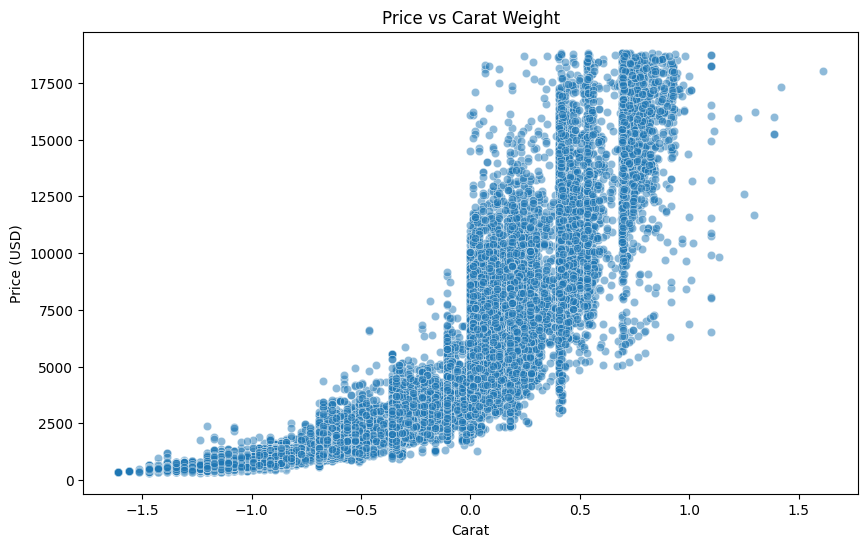

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=data, alpha=0.5)
plt.title('Price vs Carat Weight')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.show()


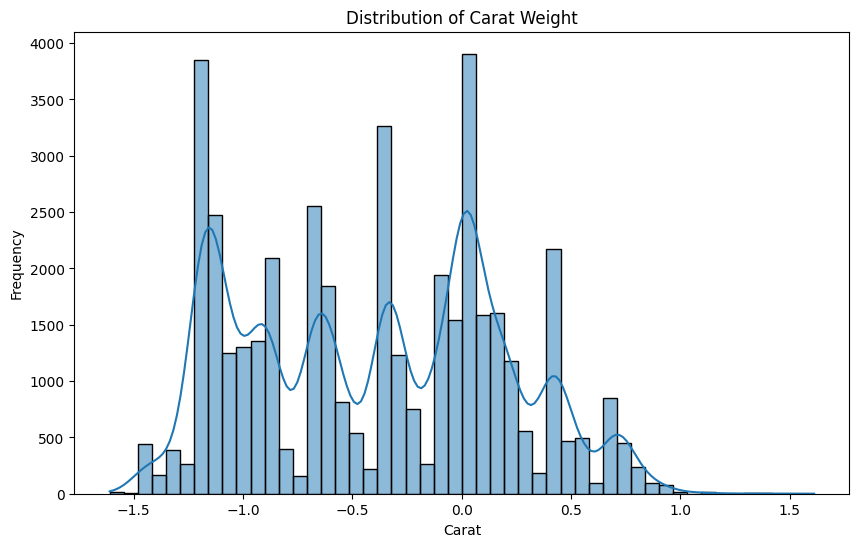

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['carat'], bins=50, kde=True)
plt.title('Distribution of Carat Weight')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()


### Correlation

In [18]:
corr_matrix = numeric_data.corr()
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.023989,0.182861,0.921872,0.977923,0.948733,0.957294
depth,0.023989,1.000000,-0.302684,-0.013225,-0.029508,-0.033253,0.090595
table,0.182861,-0.302684,1.000000,0.128571,0.198068,0.185019,0.152507
price,0.921872,-0.013225,0.128571,1.000000,0.887172,0.862936,0.864861
x,0.977923,-0.029508,0.198068,0.887172,1.000000,0.969251,0.971492
y,0.948733,-0.033253,0.185019,0.862936,0.969251,1.000000,0.948567
z,0.957294,0.090595,0.152507,0.864861,0.971492,0.948567,1.000000


### Correlation heatmap

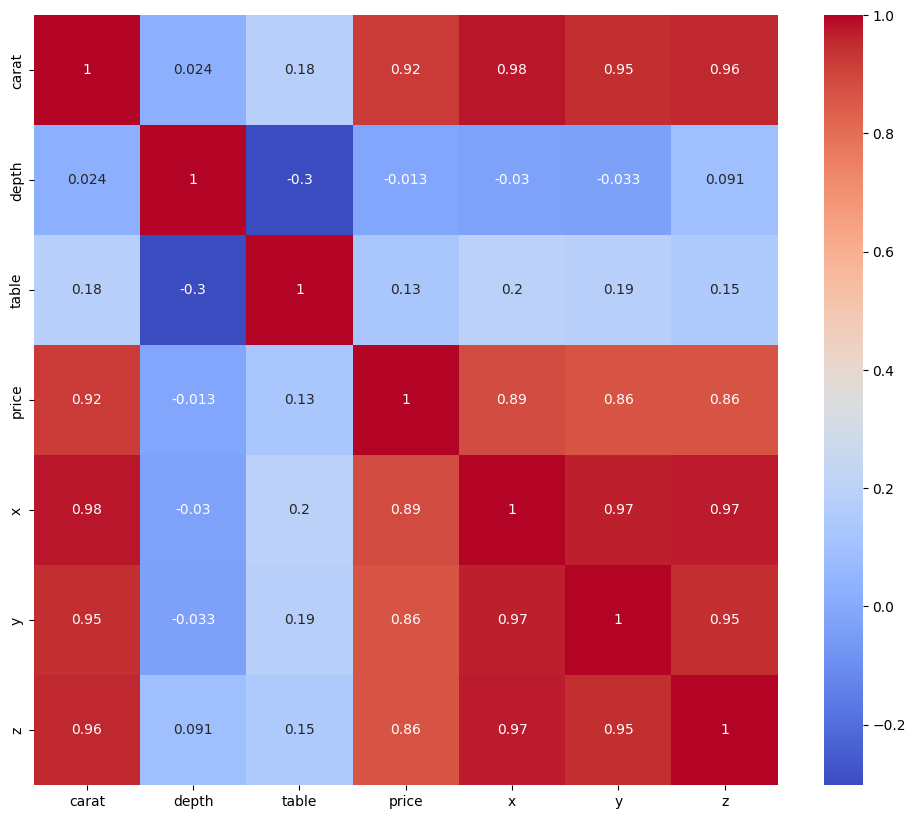

In [19]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot=True ,cmap = 'coolwarm')
plt.show()

- carat vs. price: Strong positive correlation (0.92), indicating that as carat weight increases, the price tends to increase.

- depth vs. price: Weak negative correlation (-0.01), suggesting a very small inverse relationship between depth and price.

- table vs. price: Weak positive correlation (0.13), indicating a small positive relationship between table width and price.

- x, y, z vs. price: All three dimensions (x, y, z) have strong positive correlations with price, indicating that as these dimensions increase, the price tends to increase.

- carat vs. x, y, z: Strong positive correlations, indicating that carat weight is strongly related to the dimensions x, y, and z.

- depth vs. x, y, z: Weak to moderate positive correlations, indicating some relationship between depth and the dimensions x, y, and z.

- table vs. x, y, z: Weak to moderate positive correlations, indicating some relationship between table width and the dimensions x, y, and z.

### Pairplot
useful for quickly visualizing the relationships between multiple pairs of variables in your dataset

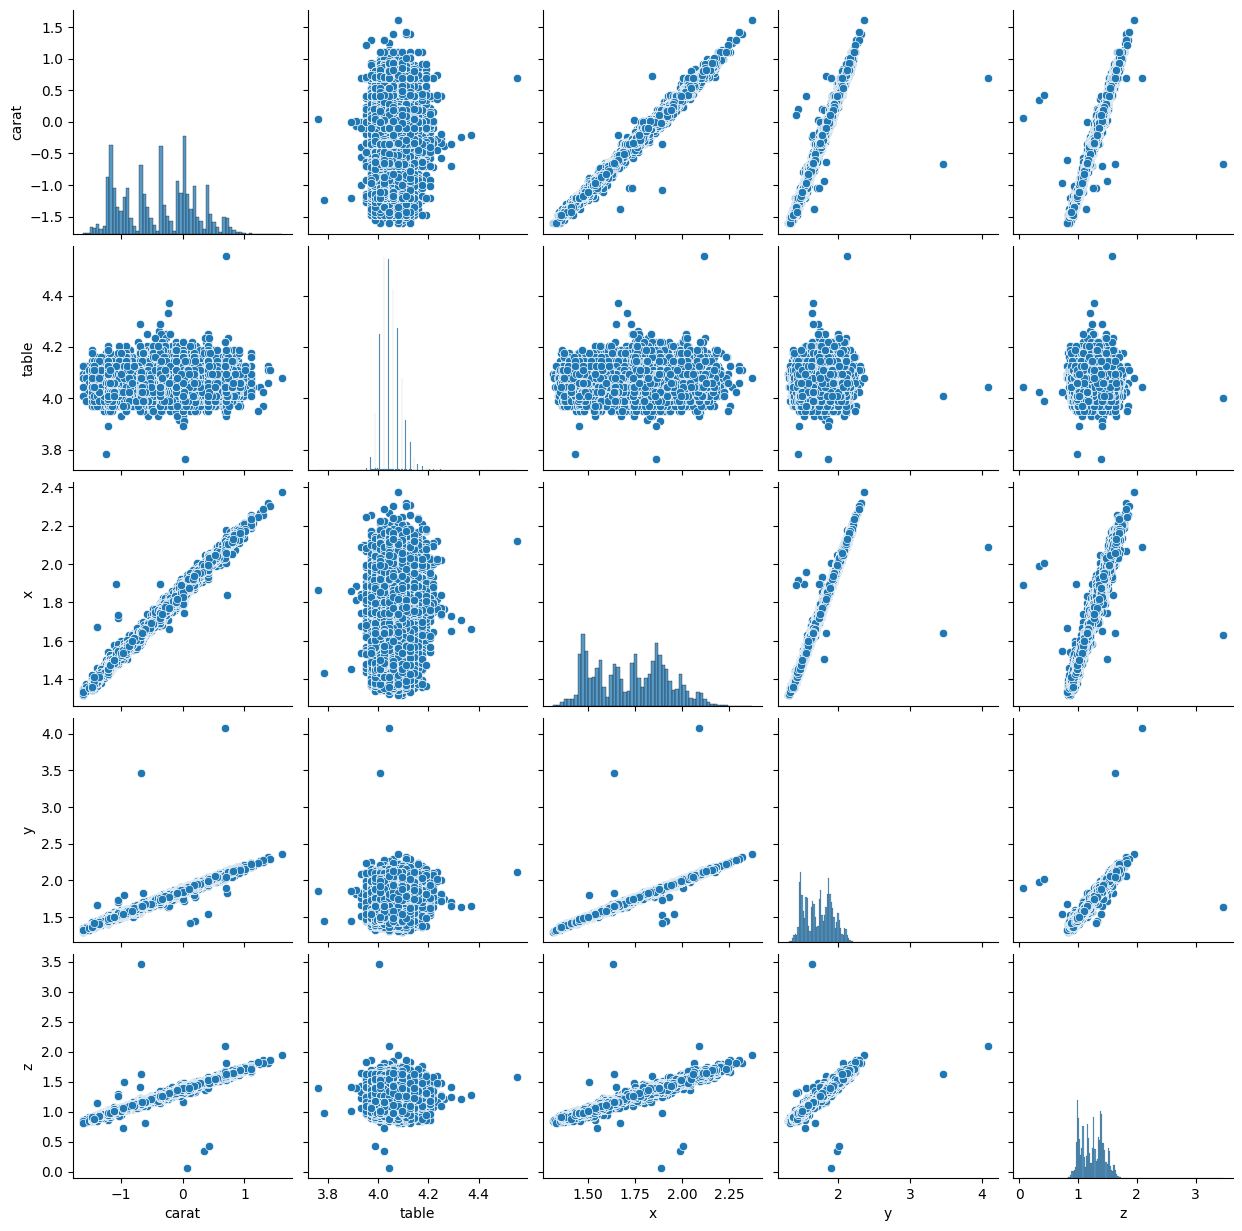

In [20]:
sns.pairplot(data[numerical_columns])
plt.show()

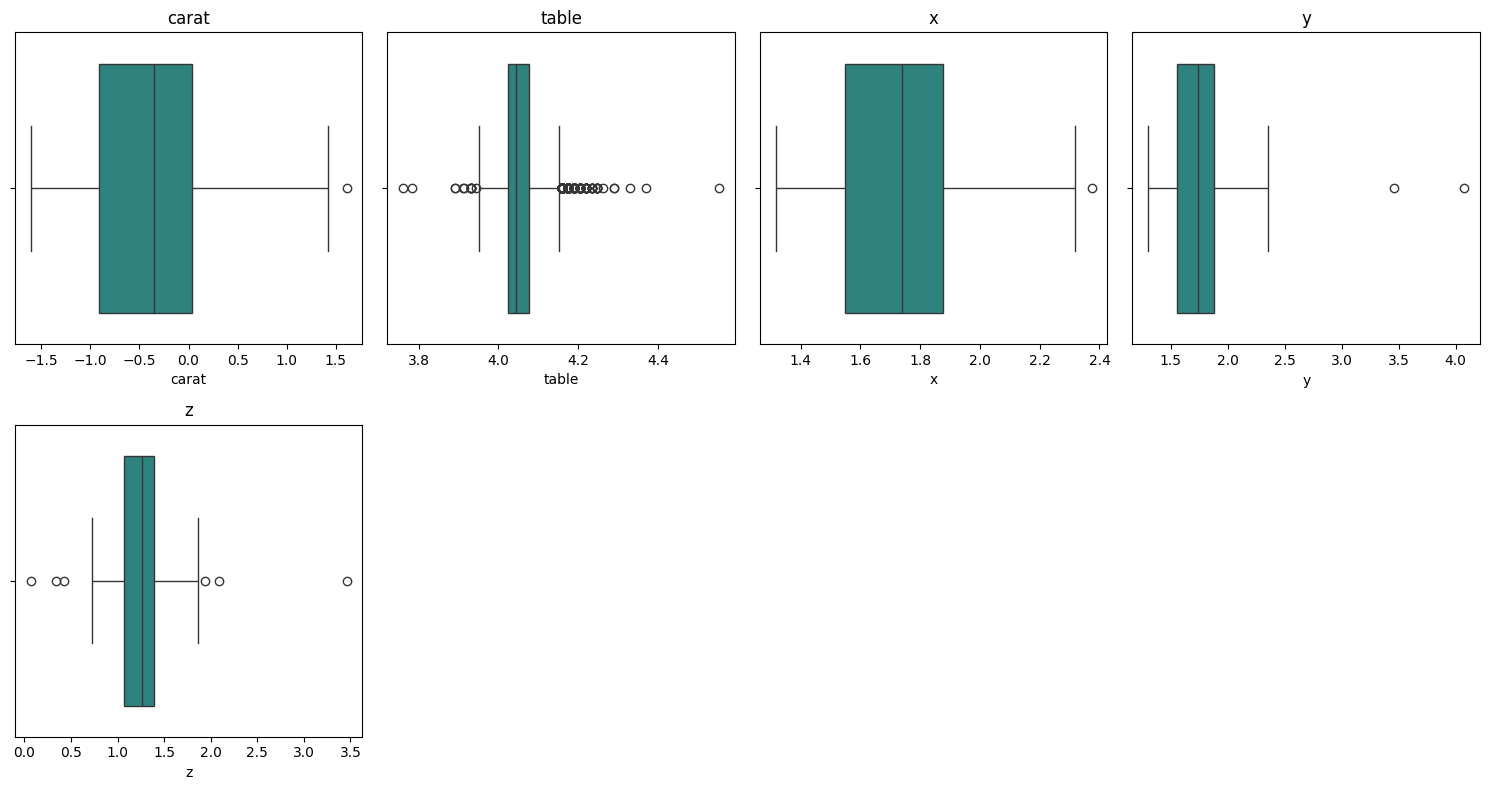

In [21]:
# Create boxplots for each numerical feature
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[column], hue=1, palette='viridis', legend=False)
    plt.title(column)
plt.tight_layout()
plt.show()


we notice that there are barely any outliers for most of the numeric data . only depth and table .

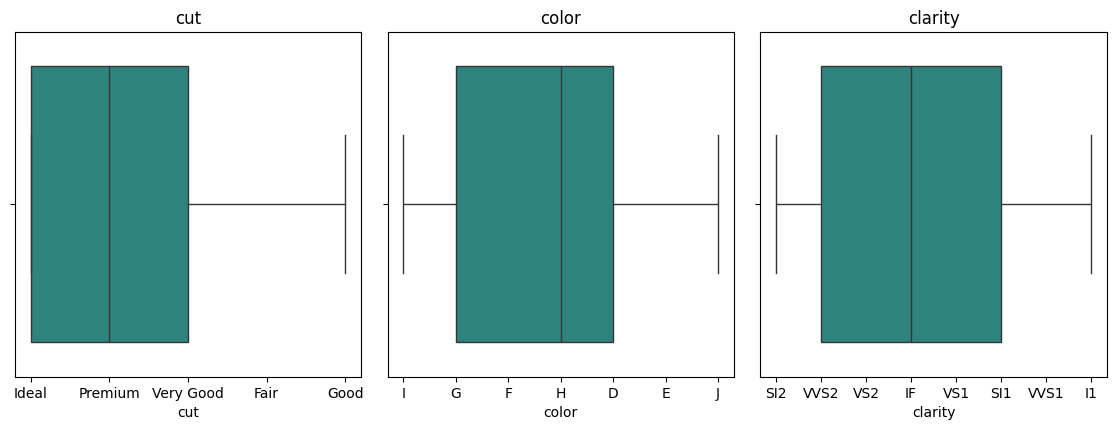

In [22]:
# Create boxplots for each numerical feature
plt.figure(figsize=(15, 8))
for i, column in enumerate(categories_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[column], hue=1, palette='viridis', legend=False)
    plt.title(column)
plt.tight_layout()
plt.show()

### BoxPlot
Useful for visualizing the distribution, central tendency, and variability of numerical data and for detecting outliers.

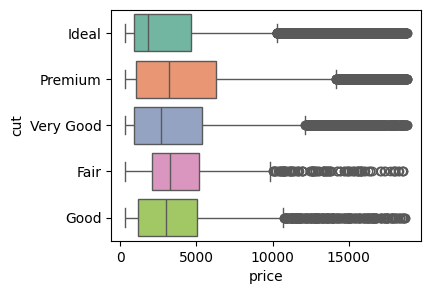

In [23]:
plt.figure(figsize=(4, 3))
sns.boxplot(data, x='price', y='cut', hue='cut', palette='Set2', legend=False);

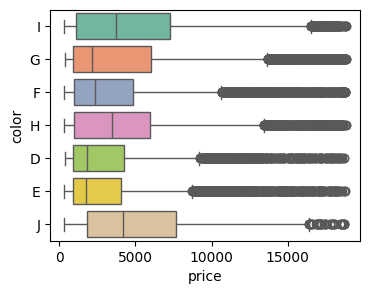

In [24]:
plt.figure(figsize=(4, 3))
sns.boxplot(data, x='price', y='color', hue='color', palette='Set2', legend=False);

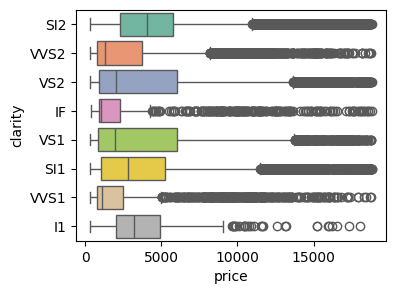

In [25]:
plt.figure(figsize=(4, 3))
sns.boxplot(data, x='price', y='clarity', hue='clarity', palette='Set2', legend=False);

### Split the Data

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=1) 

X_train = train_set.drop('price', axis=1)
y_train = train_set['price']

X_test = test_set.drop('price', axis=1)
y_test = test_set['price']  

## Prepare the Data for ML Algorithms

### Column Droper

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

we drop the column depth since its equation has a relationship between features x, y, and z. 
we also drop the table column. 

In [28]:
class ColumnDroper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X, y=None):
        # Drop 'depth'
        X = X.drop('depth', axis=1)
        X = X.drop('table', axis=1)
        return X

### Ordinal Encoder

In [29]:
class MyOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
        self.color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
        self.clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

    def fit(self, X, y=None):
        return self
    
    def transform(self, data):
        data['cut_encoded'] = data['cut'].map(self.cut_mapping)
        data['color_encoded'] = data['color'].map(self.color_mapping)
        data['clarity_encoded'] = data['clarity'].map(self.clarity_mapping)

        return data.drop(categories_columns, axis=1)


### Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('column_droper', ColumnDroper()),
    ('std_scalar', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, list(numeric_data.drop('price', axis=1))),
    ('cat', MyOrdinalEncoder(), categories_columns)
])

In [31]:
X_prepared = full_pipeline.fit_transform(X_train)

## Select and Train a Model

### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_prepared, y_train)

LinearRegression()

In [33]:
# Make predictions on the training data
y_train_pred = linear_model.predict(X_prepared)

In [34]:
from sklearn.model_selection import cross_val_score

linear_model_scores = cross_val_score(
    linear_model, X_prepared, y_train,
    scoring='neg_mean_squared_error', cv=10
)

In [35]:
linear_model_rmse = np.sqrt(-linear_model_scores)

In [36]:
def print_socres(rmse):
    print(f'Scores:\n {rmse}')
    print(f'Mean: {np.mean(rmse)}')
    print(f'Standard Deviation: {np.std(rmse)}')

In [37]:
print_socres(linear_model_rmse)

Scores:
 [1880.77556002 1834.31142258 1862.91336481 1809.45290009 1833.31191042
 1876.6435432  1912.84280047 1887.69972223 1863.66658496 1874.0210226 ]
Mean: 1863.5638831378842
Standard Deviation: 28.787049217441584


### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_prepared, y_train)

DecisionTreeRegressor()

In [39]:
tree_model_scores = cross_val_score(
    tree_model, X_prepared, y_train,
    scoring='neg_mean_squared_error', cv=10
)

In [40]:
tree_model_rmse = np.sqrt(-tree_model_scores)
print_socres(tree_model_rmse)

Scores:
 [769.42572106 772.51568588 721.18033216 748.44928776 767.60256748
 757.51148632 744.6107068  742.48081335 727.92008057 749.38726881]
Mean: 750.1083950208955
Standard Deviation: 16.30008882438047


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_prepared, y_train)

RandomForestRegressor()

In [42]:
forest_model_scores = cross_val_score(
    forest_model, X_prepared, y_train,
    scoring='neg_mean_squared_error', cv=10
)

In [43]:
forest_model_rmse = np.sqrt(-forest_model_scores)
print_socres(forest_model_rmse)

Scores:
 [575.74744275 580.83228716 565.54451115 573.11621127 594.05186791
 534.46346281 531.68565451 540.0411926  535.44139273 572.08017219]
Mean: 560.3004195071119
Standard Deviation: 21.551326105523877


### XGBOOST

In [43]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

# Fit the model on the prepared training data
xgb_model.fit(X_prepared, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
# Perform cross-validation and calculate RMSE
xgb_model_scores = cross_val_score(
    xgb_model, X_prepared, y_train,
    scoring='neg_mean_squared_error', cv=10
)

In [46]:
# Convert the negative MSE to RMSE
xgb_model_rmse = np.sqrt(-xgb_model_scores)

In [47]:
# Print the XGBoost model scores
print_socres(xgb_model_rmse)

Scores:
 [564.58654298 564.12410143 569.04845218 555.32030886 611.86888129
 548.04272217 535.05524659 556.62825409 532.41723611 563.94548583]
Mean: 560.1037231518087
Standard Deviation: 20.94051922852448


### Save Models

In [48]:
import joblib

joblib.dump(linear_model, 'models\linear_model.pkl')
joblib.dump(tree_model, 'models\desicion_tree_model.pkl')
joblib.dump(forest_model, 'models\\random_forest_model.pkl')
joblib.dump(xgb_model, 'models\\xgb_model.pkl')

# For later: load the model
#model = joblib.load("models\model.pkl")

['models\\xgb_model.pkl']

## Fine-Tune

In [49]:
import joblib

model = joblib.load("models\\xgb_model.pkl")

### Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=xgb_model, param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3, n_jobs=-1, verbose=2
)

In [51]:
grid_search.fit(X_prepared, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [52]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)
print("Best parameters found: ", best_params)
print("Best RMSE score: ", best_score)

Best parameters found:  {'max_depth': None, 'n_estimators': 100}
Best RMSE score:  563.3591025480436


In [53]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(f'{np.sqrt(-mean_score):.2f} : {params}')

563.36 : {'max_depth': None, 'n_estimators': 100}
572.46 : {'max_depth': None, 'n_estimators': 200}
582.27 : {'max_depth': None, 'n_estimators': 300}
594.09 : {'max_depth': 10, 'n_estimators': 100}
602.36 : {'max_depth': 10, 'n_estimators': 200}
605.30 : {'max_depth': 10, 'n_estimators': 300}
609.65 : {'max_depth': 20, 'n_estimators': 100}
609.72 : {'max_depth': 20, 'n_estimators': 200}
609.72 : {'max_depth': 20, 'n_estimators': 300}
608.35 : {'max_depth': 30, 'n_estimators': 100}
608.35 : {'max_depth': 30, 'n_estimators': 200}
608.35 : {'max_depth': 30, 'n_estimators': 300}


In [54]:
importance = grid_search.best_estimator_.feature_importances_

features = X_train.columns
feature_importance_pair = zip(importance, features)
sorted(feature_importance_pair, reverse=True)

[(0.4628803, 'color'),
 (0.4027191, 'carat'),
 (0.07335402, 'x'),
 (0.03252129, 'table'),
 (0.017049553, 'clarity'),
 (0.0077938964, 'cut'),
 (0.0036818618, 'depth')]

In [55]:
import joblib

joblib.dump(grid_search.best_estimator_, 'models/best_model.pkl')

['models/best_model.pkl']

## Test

In [56]:
model = joblib.load('models/best_model.pkl')

X_test_prepared = full_pipeline.transform(X_test)
prediction = model.predict(X_test_prepared)

In [57]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
rmse

537.810271102209

## Submution

In [46]:
test = pd.read_csv('test.csv')

ID = test['Id']
test_prepared = full_pipeline.transform(test.drop('Id', axis=1)) 
price = model.predict(test_prepared)

result = {'ID': ID, 'price': price}
sub = pd.DataFrame(result)
sub.to_csv('sub.csv', index=False)

### Evaluation Plots For All Four Models

In [59]:
# Predict using the trained models
y_pred_linear = linear_model.predict(X_test_prepared)
y_pred_decision_tree = tree_model.predict(X_test_prepared)
y_pred_random_forest = forest_model.predict(X_test_prepared)
y_pred_xgboost = xgb_model.predict(X_test_prepared)

In [58]:
import matplotlib.pyplot as plt

def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

In [60]:
def plot_prediction_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(f'Prediction vs Actual for {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

In [61]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    val_scores_mean = -val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation error')
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.legend()
    plt.show()


In [62]:
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance for {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [63]:
from sklearn.model_selection import cross_val_score

def plot_cross_val_scores(models, X, y):
    cv_scores = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_scores[model_name] = -scores

    plt.figure(figsize=(10, 6))
    plt.boxplot(cv_scores.values(), labels=cv_scores.keys())
    plt.title('Cross-Validation Scores Comparison')
    plt.ylabel('Mean Squared Error')
    plt.show()


### Residual Plot

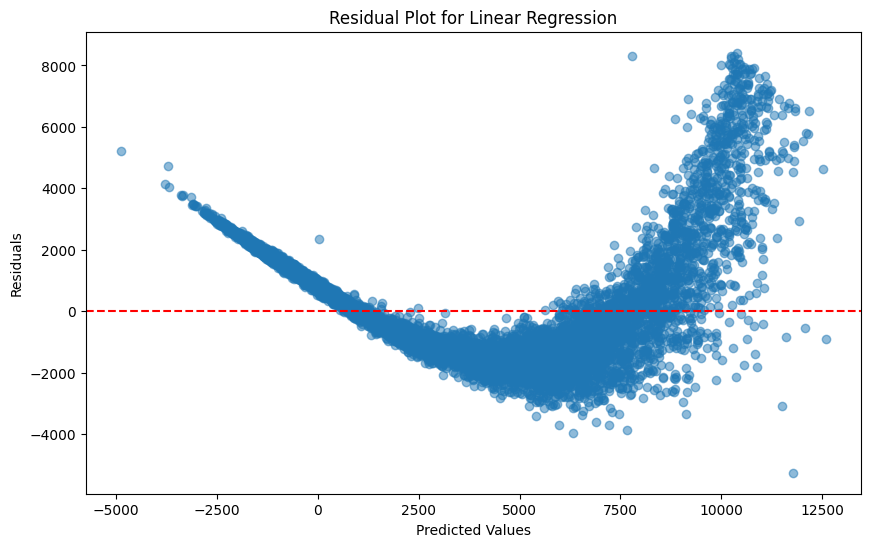

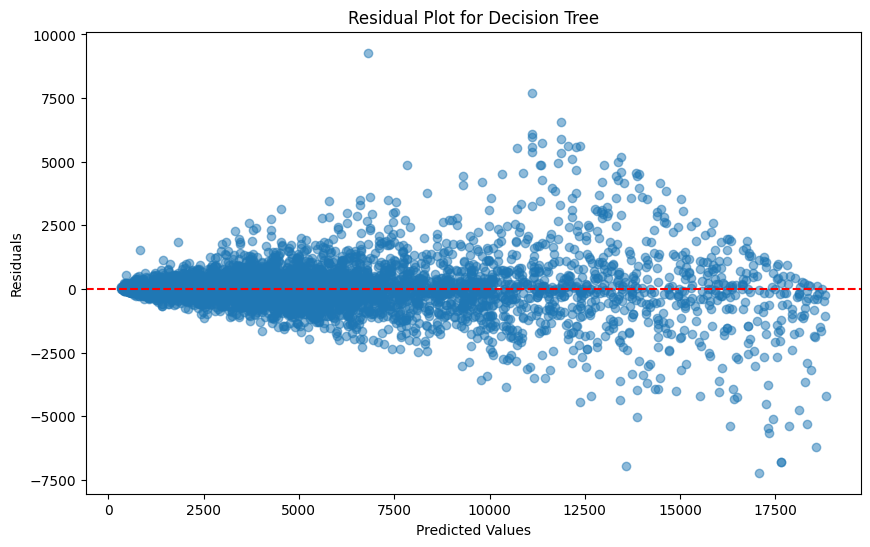

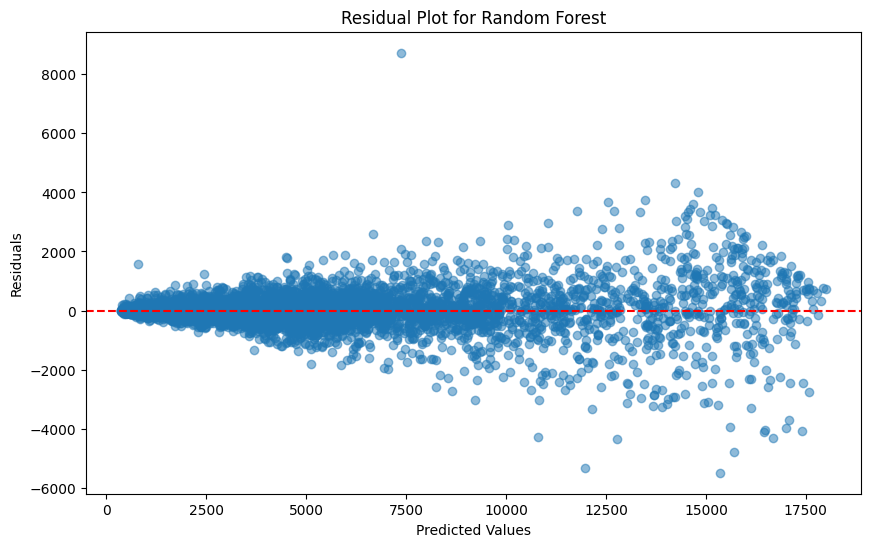

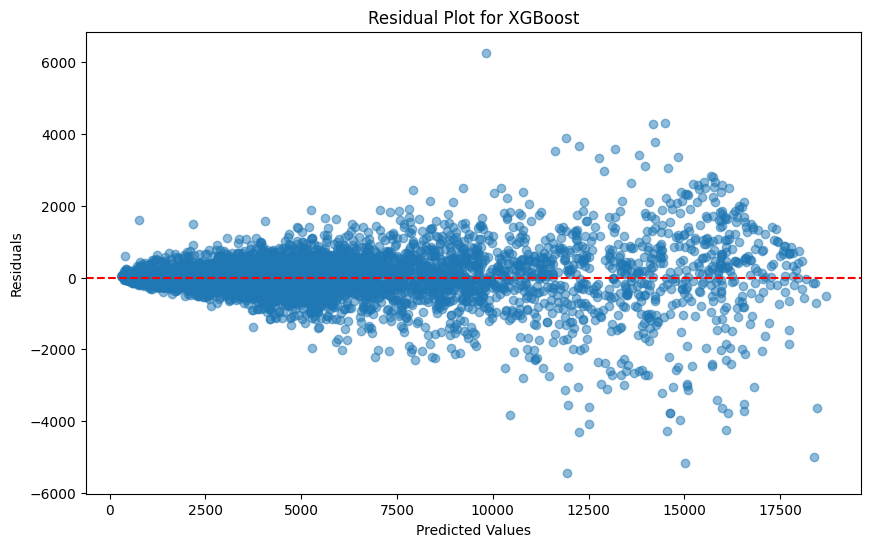

In [64]:
plot_residuals(y_test, y_pred_linear, 'Linear Regression')
plot_residuals(y_test, y_pred_decision_tree, 'Decision Tree')
plot_residuals(y_test, y_pred_random_forest, 'Random Forest')
plot_residuals(y_test, y_pred_xgboost, 'XGBoost')

### Prediction vs Actual Plot

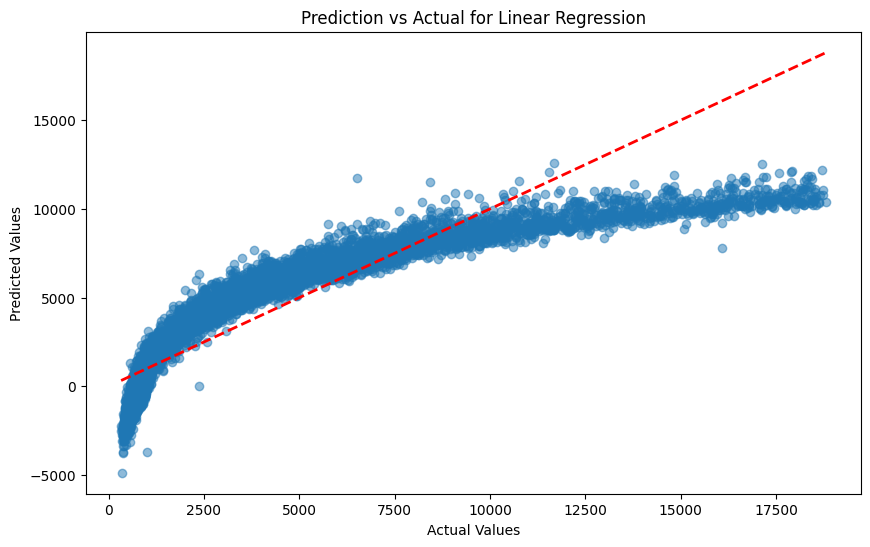

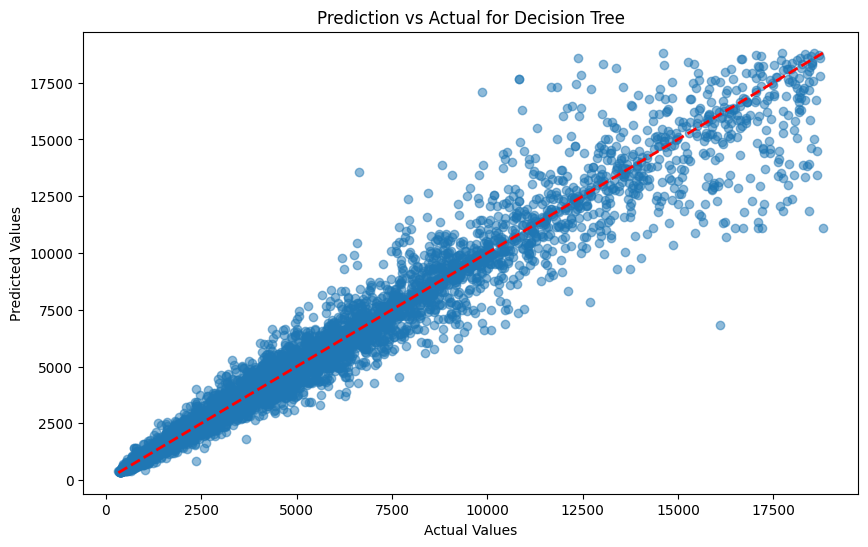

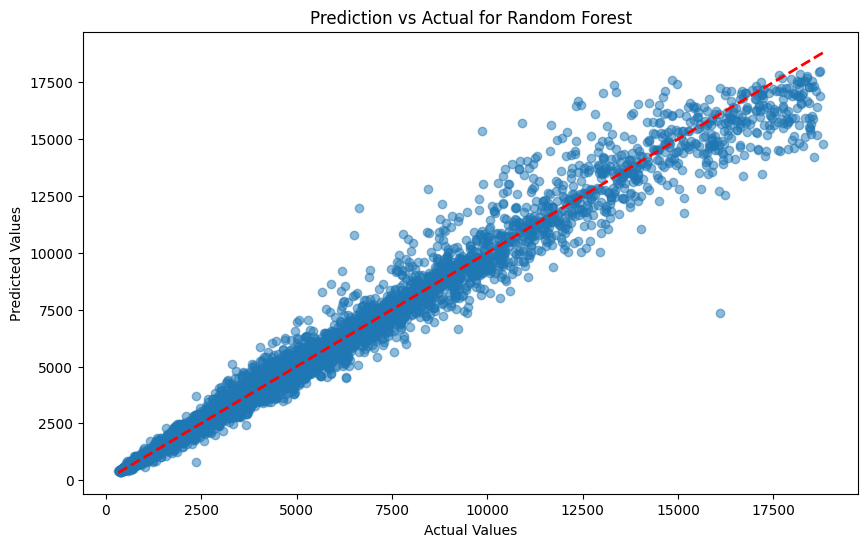

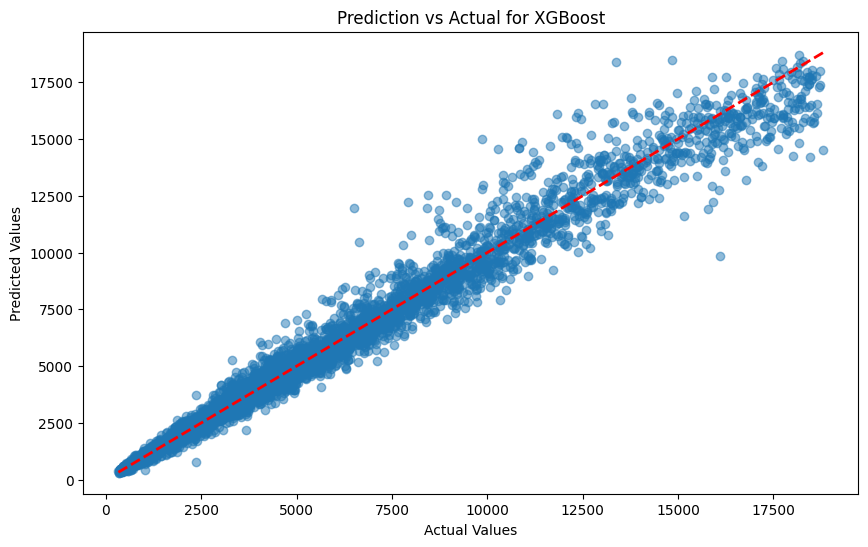

In [65]:
plot_prediction_vs_actual(y_test, y_pred_linear, 'Linear Regression')
plot_prediction_vs_actual(y_test, y_pred_decision_tree, 'Decision Tree')
plot_prediction_vs_actual(y_test, y_pred_random_forest, 'Random Forest')
plot_prediction_vs_actual(y_test, y_pred_xgboost, 'XGBoost')


###  Learning Curve

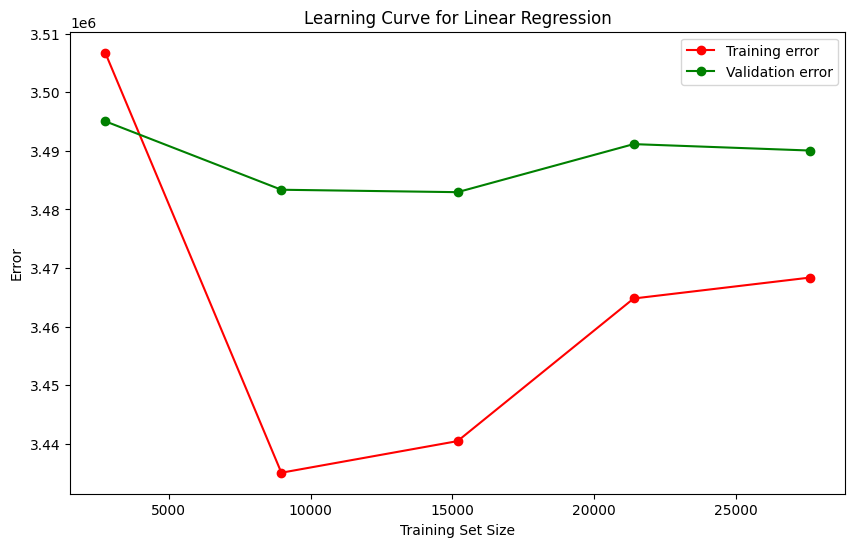

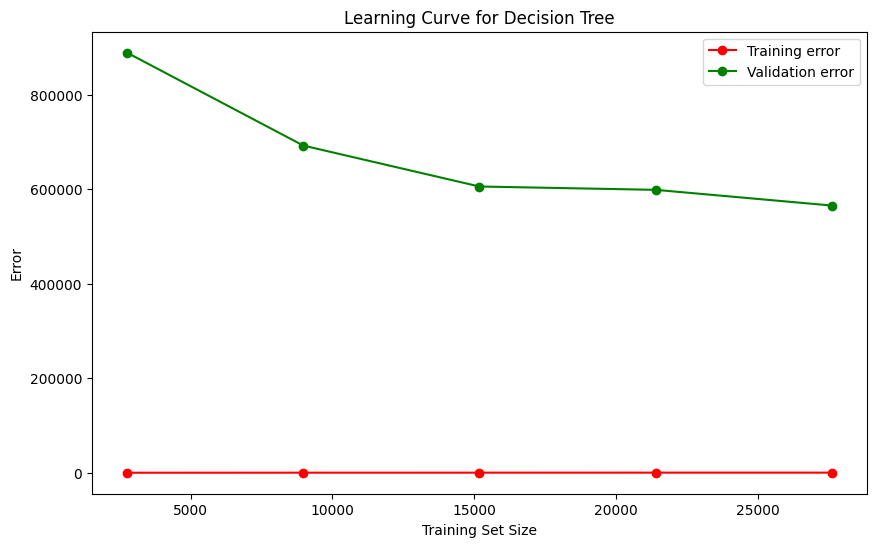

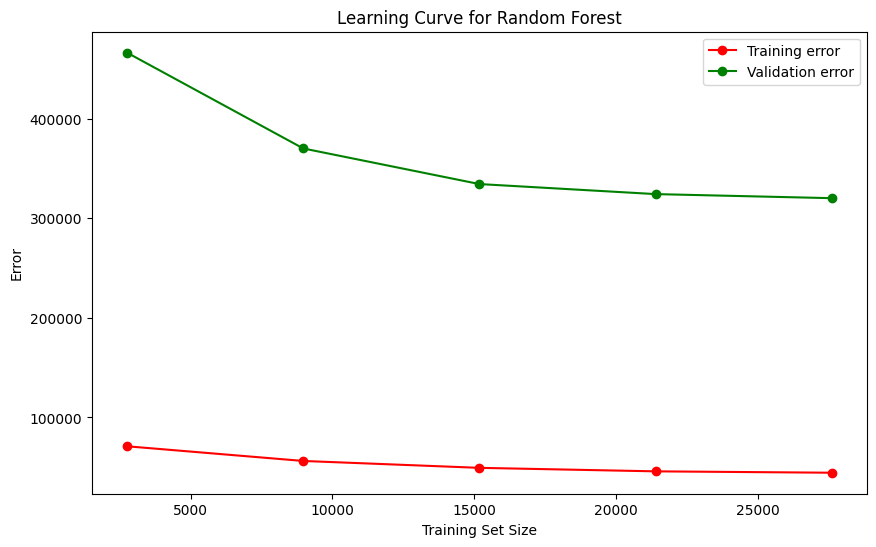

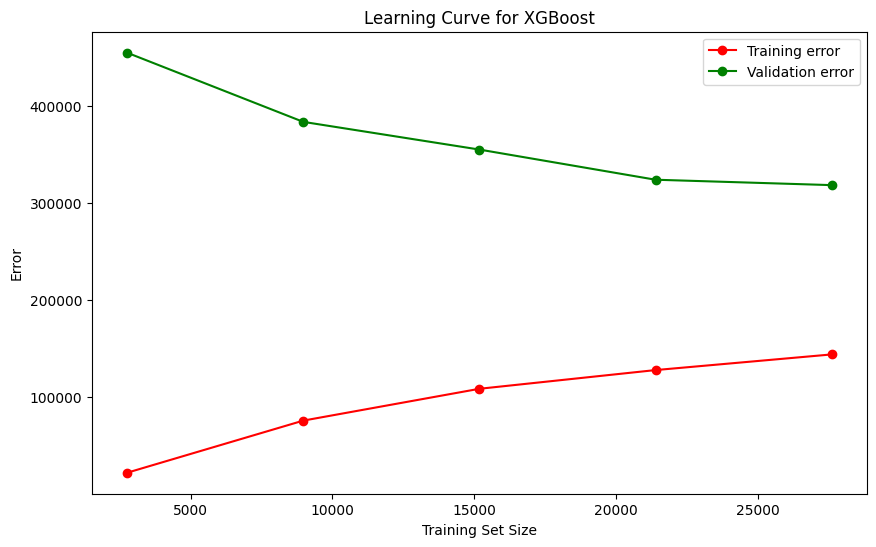

In [66]:
plot_learning_curve(linear_model, X_prepared, y_train, 'Linear Regression')
plot_learning_curve(tree_model, X_prepared, y_train, 'Decision Tree')
plot_learning_curve(forest_model, X_prepared, y_train, 'Random Forest')
plot_learning_curve(xgb_model, X_prepared, y_train, 'XGBoost')


###  Feature Importance Plot

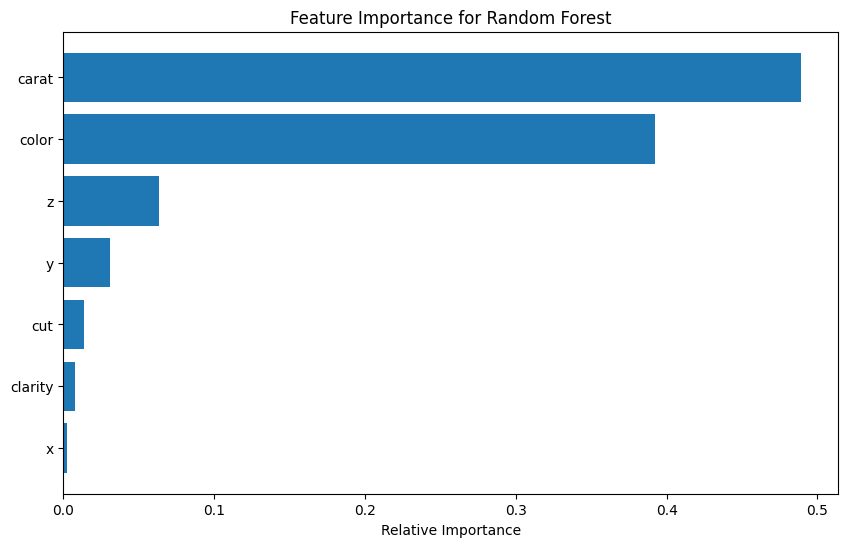

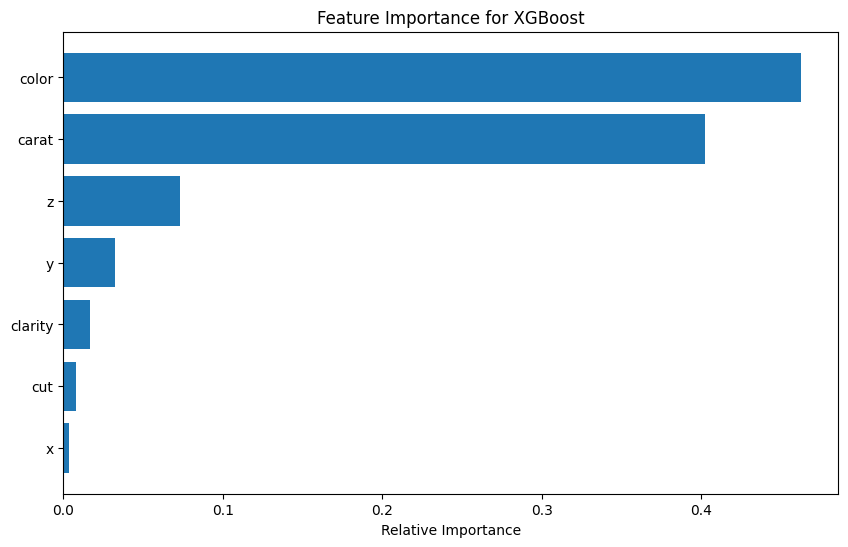

In [69]:
# List of feature names
feature_names = ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']

plot_feature_importance(forest_model, feature_names, 'Random Forest')
plot_feature_importance(xgb_model, feature_names, 'XGBoost')

### Cross-Validation Score Plot

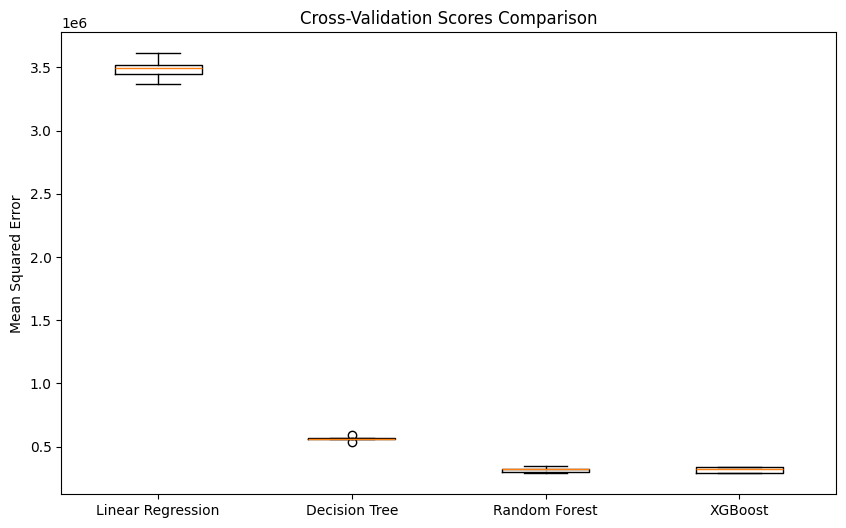

In [68]:
models = {
    'Linear Regression': linear_model,
    'Decision Tree': tree_model,
    'Random Forest': forest_model,
    'XGBoost': xgb_model
}
plot_cross_val_scores(models, X_prepared, y_train)
